# Accidentes de tránsito en New York 

En este caso práctico haremos la exploración de un data set aplicando  algunas de las etapas de los procesos de ciencia de datos. Haremos transformación y limpieza de los datos. Entenderemos cómo extraer valor de los datos desde una perspectiva exploratoria

El caso estará estructurado así

1. Explorar la estructura de los datos
2. Hacer un análisis exploratorio y descriptivo de las principales variables
3. Sacar conclusiones e hipótesis de análisis a partir de los hallazgos

## Librerías utilizadas durante la clase

- [json](https://docs.python.org/3/library/json.html): Es un formato de intercambio de datos ligero inspirado en la sintaxis literal de objetos JavaScript 
- [requests](https://requests.readthedocs.io/en/master/): Requests le permite enviar solicitudes HTTP / 1.1 con mucha facilidad. No es necesario agregar manualmente cadenas de consulta a sus URL ni codificar en formato sus datos POST.
- [bs4-BeautifulSoup](https://pypi.org/project/beautifulsoup4/): Beautiful Soup es una biblioteca que facilita la extracción de información de páginas web. Se asienta sobre un analizador HTML o XML, proporcionando modismos Pythonic para iterar, buscar y modificar el árbol de análisis.
- [pandas](https://pandas.pydata.org/): Es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- [matplotlib](https://pypi.org/project/matplotlib/): Es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python.
- [seaborn](https://seaborn.pydata.org/): Es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
- [numpy](https://numpy.org/): librería que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas

In [33]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
# display setting Para visualizar el máximo de columnas
pd.set_option('display.max_columns', None)

**Contexto** 
New York ha tenido un incremento en el número de accidentes de tránsito constante y se requiere analizar datos de estos accidentes del periodo Enero 2018 - Agosto 2019. 

**Problema de negocio**
Identificar patrones en la data que permita tomar decisiones informadas dirigidas hacia la planeación de políticas públicas de caracter preventivo para diminuir el número y/o gravedad de los accidentes

In [3]:
with open('data/accidents.csv') as f:
    accidentes=pd.read_csv(f, delimiter=';')

In [4]:
accidentes.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


Se tienen las variables 
- BOROUGH: Vecindario donde ocurrió el accidente
- COLLISION_ID: ID del accidente
- CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Razones del accidente
- CROSS STREET NAME: La calle cruzada más cercana en la que pasó el accidente
- DATE: Fecha del accidente
 -TIME: Hora del accidente
 -LATITUDE: Latitud del accidente
- LONGITUDE: Longitud del accidente
- NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED: Número de heridos de cada tipo
- NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED: Número de muertos de cada tipo
- ON STREET NAME: Calle de accidente
- VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipo de vehículo involucrado en el accidente
- ZIP CODE: Código zip del accidente

In [5]:
accidentes.shape

(238522, 24)

**¿Han incrementado el número de accidentes en el periodo de observación?**

Para hacer éste análisis primero debemos cambiar el formato de la columna de la fecha para manejarla apropiadamente. 

In [6]:
accidentes['DATE']=pd.to_datetime(accidentes['DATE'])

Con esta transformación podemos extraer el mes de la fecha y hacer un análisis por meses. ¿Qué podemos concluir del número de accidentes por mes?

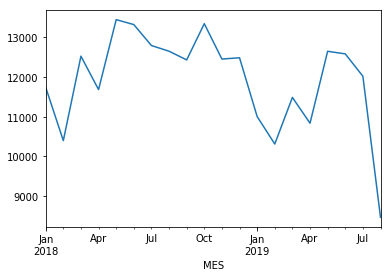

In [7]:
accidentes['MES'] = accidentes['DATE'].dt.to_period('M')
accidentes_mes = accidentes.groupby(accidentes['MES']).size()
accidentes_mes.plot.line()

**¿Existen patrones horarios en los accidentes?**

In [8]:
# transformación de la hora del accidente a formato de fecha
accidentes['TIME'] = pd.to_datetime(accidentes['TIME'])

Al igual que la fecha podemos transformar el formato de la hora y crear una variable que contenga únicamente la hora del accidente

In [9]:
accidentes['HORA'] = accidentes['TIME'].dt.hour

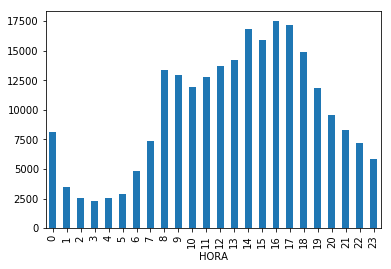

In [10]:
# Conteo de accidentes por hora
accidentes_hora = accidentes.groupby('HORA').size()
accidentes_hora.plot.bar()

**¿Existen patrones en los accidentes según el día de la semana?**

In [11]:
# Creamos una variable con el día de la semana de la fecha del accidente
accidentes['DIA'] = accidentes['DATE'].dt.weekday
# weekday, enumera los días de 0 - 6

In [12]:
accidentes.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MES,HORA,DIA
0,2018-09-26,2020-10-20 12:12:00,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,2018-09,12,2
1,2018-09-25,2020-10-20 16:30:00,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,2018-09,16,1
2,2019-08-22,2020-10-20 19:30:00,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,2019-08,19,3
3,2018-09-23,2020-10-20 13:10:00,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-09,13,6
4,2019-08-20,2020-10-20 22:40:00,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,2019-08,22,1


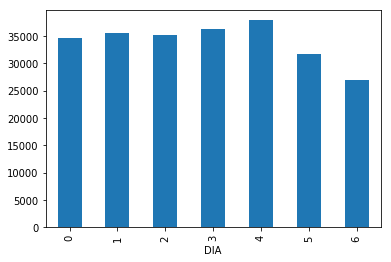

In [13]:
# Conteo de accidentes por dia de la semana
accidentes_dia = accidentes.groupby('DIA').size()
accidentes_dia.plot.bar()

**¿Existen patrones accidentales por vecindario?**

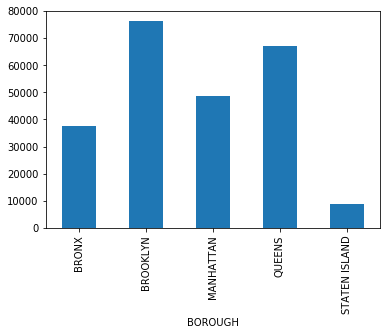

In [14]:
vec = accidentes.groupby('BOROUGH').size()
vec.plot.bar()

## ¿Por qué razón deberíamos estandarizar estos conteos?

Carguemos la información adicional de los vecindarios para poder analizarlos

In [15]:
borough_data = pd.read_csv('data/borough_data.csv')

In [16]:
borough_data

,borough,population,area
0,the bronx,1471160,42.10
1,brooklyn,2648771,70.82
2,manhattan,1664727,22.83
3,queens,2358582,108.53
4,staten island,479458,58.37


Para hacer los conteos de accidentes comparables podemos relativizar utilizando el área de los vecindarios. Para esto primero debemos asociar las dos tablas de información

In [17]:
print(accidentes['BOROUGH'].unique())

['BRONX' 'BROOKLYN' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND']


El único vecindario que no haría match sería 'the bronx' con 'BRONX'

In [18]:
borough_data.loc[borough_data.borough=='the bronx','borough'] = 'bronx'

In [19]:
borough_frame = pd.DataFrame(vec)
borough_frame.columns = ['count']
borough_frame['borough'] = borough_frame.index
borough_frame

,count,borough
BOROUGH,,
BRONX,37709,BRONX
BROOKLYN,76253,BROOKLYN
MANHATTAN,48749,MANHATTAN
QUEENS,67120,QUEENS
STATEN ISLAND,8691,STATEN ISLAND


Adicionalmente, necesitamos transformar los valores en el df a minúsculas para poder calcular los conteos de accidentes relativos al área del vecindario

In [20]:
borough_data.borough = borough_data.borough.str.upper()
borough_data

,borough,population,area
0,BRONX,1471160,42.10
1,BROOKLYN,2648771,70.82
2,MANHATTAN,1664727,22.83
3,QUEENS,2358582,108.53
4,STATEN ISLAND,479458,58.37


In [21]:
borough_frame = borough_frame.merge(borough_data, left_on='borough',right_on='borough')
borough_frame

,count,borough,population,area
0,37709,BRONX,1471160,42.10
1,76253,BROOKLYN,2648771,70.82
2,48749,MANHATTAN,1664727,22.83
3,67120,QUEENS,2358582,108.53
4,8691,STATEN ISLAND,479458,58.37


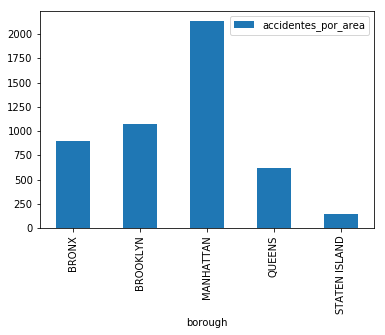

In [22]:
borough_frame['accidentes_por_area'] = borough_frame['count']/borough_frame['area']
borough_frame.plot.bar(x='borough', y='accidentes_por_area')

**Ampliemos el análisis de manera bivariada**

¿Existen patrones horarios en la accidentalidad por vecindario?

In [23]:
# creamos conteo de accidentes por hora y vecindario
df1 = pd.DataFrame({'count': accidentes.groupby(['BOROUGH', 'HORA']).size()})
df1 = df1.reset_index()

/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:729: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x576 with 0 Axes>

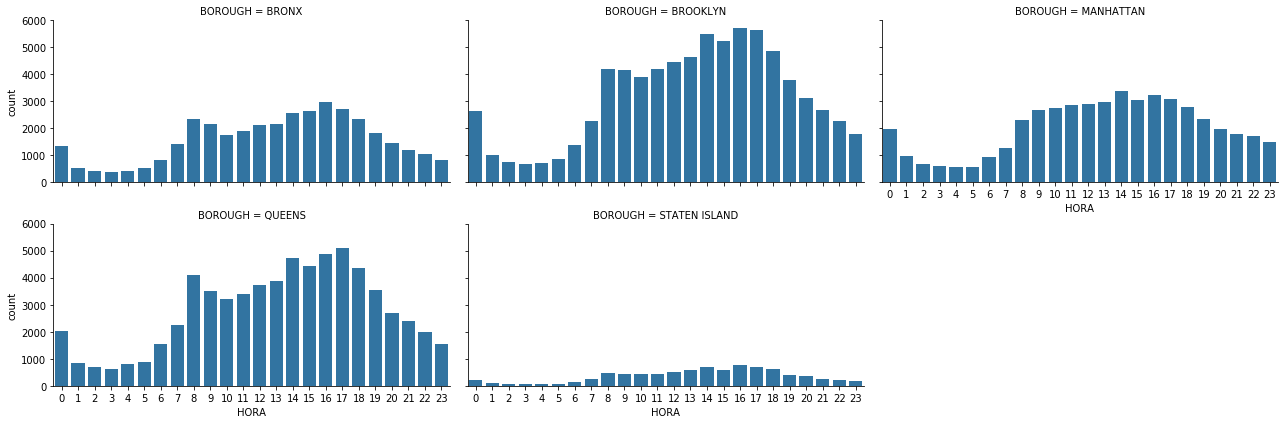

In [24]:
plt.figure(figsize=(10,8))
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=accidentes['BOROUGH'].unique)
chart.map(sns.barplot, 'HORA', 'count',)

**¿Cuáles son las causas más comunes de los accidentes?**

Debemos tener en cuenta las 5 columnas de CONTRIBUTING FACTOR para hacer este análisis

In [25]:
columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
           'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
          'CONTRIBUTING FACTOR VEHICLE 5']

In [26]:
# creamos un nuevo df con todos los factores en una sola columna
frames=[accidentes[column].reset_index().rename(columns={column:'FACTOR'}) for column in columns]
factors_df=pd.concat(frames)


In [27]:
# agurpamos por el índice para poder descartar factores que se repiten en el mismo accidente
no_rep_factors=factors_df.groupby(['index','FACTOR']).size().reset_index()

In [28]:
# Conteo de accidentes por factor
final_df=no_rep_factors.groupby(['FACTOR']).size()
final_df=final_df.sort_values(ascending=False).reset_index()
final_df.head(10)

,FACTOR,0
0,Unspecified,190096
1,Driver Inattention/Distraction,61752
2,Failure to Yield Right-of-Way,19641
3,Following Too Closely,17293
4,Backing Unsafely,14835
5,Passing Too Closely,12631
6,Passing or Lane Usage Improper,11808
7,Other Vehicular,8860
8,Unsafe Lane Changing,6643
9,Turning Improperly,6626


**Y ¿cuáles son los tipos de vehículos involucrados en mas accidentes?**

In [29]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',]

#First, we concatenate all the corresponding columns into a big data-frame
frames=[accidentes[column].reset_index().rename(columns={column:'VEHICLE'}) for column in columns]
vehicle_df=pd.concat(frames)


#The reasoning behind doing reset_index() is that we can use a groupby on the indexes to delete repetitions as follows:
no_rep_vehicle=vehicle_df.groupby(['index','VEHICLE']).size().reset_index()

In [30]:

#The data frame we are looking for is given by
final_dfv=no_rep_vehicle.groupby(['VEHICLE']).size()

#Since we want to search for the most common factors of accidents, we can do the following:
final_dfv=final_dfv.sort_values(ascending=False).reset_index()
final_dfv.head(10)


,VEHICLE,0
0,Sedan,119714
1,Station Wagon/Sport Utility Vehicle,99146
2,PASSENGER VEHICLE,31228
3,SPORT UTILITY / STATION WAGON,25059
4,Taxi,14584
5,Pick-up Truck,10864
6,Box Truck,8509
7,Bike,6264
8,Bus,5848
9,TAXI,4497


**Pueden existir patrones de factores o vehículos diferencial para vecindarios?**

In [31]:
columns =['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 
           'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
          'CONTRIBUTING FACTOR VEHICLE 5']


# Concatenate all corresponding frames.
frames=[accidentes[['BOROUGH',column]].rename(columns={'BOROUGH':'BOROUGH',column:'FACTOR'}) for column in columns]
factor_df=pd.concat(frames).reset_index()

#Count repetitions
no_rep_factor=factor_df.groupby(['index','BOROUGH','FACTOR']).size().reset_index()


final_df=no_rep_factor.groupby(['BOROUGH','FACTOR']).size().sort_values(ascending=False).reset_index()

final_df.head(10)

,BOROUGH,FACTOR,0
0,BROOKLYN,Unspecified,63448
1,QUEENS,Unspecified,54884
2,MANHATTAN,Unspecified,35375
3,BRONX,Unspecified,29342
4,QUEENS,Driver Inattention/Distraction,19517
5,BROOKLYN,Driver Inattention/Distraction,17997
6,MANHATTAN,Driver Inattention/Distraction,14986
7,QUEENS,Failure to Yield Right-of-Way,7420
8,STATEN ISLAND,Unspecified,7047
9,BRONX,Driver Inattention/Distraction,6867


In [32]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',]

# Concatenate all corresponding frames.
frames=[accidentes[['BOROUGH',column]].rename(columns={'BOROUGH':'BOROUGH',column:'VEHICLE'}) for column in columns]
vehicles_df=pd.concat(frames).reset_index()

#Count repetitions
no_rep_vehicles=vehicles_df.groupby(['index','BOROUGH','VEHICLE']).size().reset_index()

#Then get rid of these
final_df=no_rep_vehicles.groupby(['BOROUGH','VEHICLE']).size().sort_values(ascending=False).reset_index()

final_df.head(10)

,BOROUGH,VEHICLE,0
0,BROOKLYN,Sedan,39459
1,QUEENS,Sedan,35103
2,BROOKLYN,Station Wagon/Sport Utility Vehicle,32262
3,QUEENS,Station Wagon/Sport Utility Vehicle,31647
4,MANHATTAN,Sedan,20727
5,BRONX,Sedan,19652
6,MANHATTAN,Station Wagon/Sport Utility Vehicle,16432
7,BRONX,Station Wagon/Sport Utility Vehicle,15434
8,BROOKLYN,PASSENGER VEHICLE,10177
9,MANHATTAN,Taxi,8989


## Ejercicios

**1. ¿Qué podemos decir sobre el número de personas heridas y muertes en los accidentes? Exploremos el comportamiento del total de heridos y total de muertes en todos los accidentes. (Crear una nueva columna que sume todos los herido y otra que sume todas las muertes)**

**2. Exploremos las muertes y heridas por peatón, ciclista y motociclista. Existen diferencias en estos? En qué casos mueren más personas durante los accidentes? En qué casos resultan más heridos?**

**3. ¿ Existen patrones en las muertes y heridos en accidentes por vecindario? En cuál vecindario se presentaron más muertes? En cuál menos?**

**4. A partir de los análisis anteriores, qué recomendaciones sobre la planeación de políticas preventivas frente a la accidentalidad se podrían hacer para reducir los accidentes y su gravedad?**

**5. ¿Qué otras variables o análisis exploratorios podríamos hacer para complementar este análisis?**

**6. ¿Cuáles podrían ser los siguientes pasos para el análisis de este problema en búsqueda de soluciones?**

## Conclusiones

- La exploración y descripción inicial de los datos es una gran herramienta para encontrar patrones de interés del problema 
- Encontramos patrones en los datos que ayudan a generar hipótesis sobre el comportamiento de los accidentes
- Resultan ser relevantes factores cómo el día de la semana, hora y vecindario para analizar el comportamiento de la accidentalidad
- Esta descripción puede ser una guía importante para definir pasos siguientes en un análisis con mayor profundidad